In [59]:
# https://github.com/laike9m/pdir2/wiki/User-Configuration
!export PDIR2_CONFIG_FILE="~/.pdir2config"

In [1]:
%%file ~/.pdir2config
[global]
category-color = magenta
attribute-color = bright blue
comma-color = bright blue
doc-color = bright black
#uniform-color = bright black

Overwriting /home/enrico/.pdir2config


# Object Oriented Programming in Python

How to develop libraries and program with human API

## code categorization

#### prompt

In a prompt one writes commands, they executes and they are forgotten.
This is the most common case for bash, but can be done in python as well once one is sufficiently well versed in it using smart shells like **IPython**

#### scripts

A script can be seen as a way of repeating a series of commands.
It has a very well defined scope and does not need configurations, option managements, and so on.
They are mostly run just once to perform a specific job and that's it

#### libraries

A library is an organized collection of functions, routines and objects that are designed to be used by someone else than the original writer.
This is where good programming practice start to matter seriously.
Library need an API (Application Programming Interface) that defines what and how is possible to do with the library.

Library design is one of the main reasons for object oriented programming: it allows to design consistent and well structured interfaces that helps the user obtaining what they wants and guide them down the right path avoiding bad practices

#### programs

A program is a higher level interaction: the user does not need to write code, aside some configuration files in case.
It performs a specific goal, and might be run very often or even continuously by the user.

they are often classified based on their interface (even if this is often just different possibilities of interacting with the same underlying commands):
* **GUI** - graphical user interface
* **CLI** - command line interface
* **TUI** - text-based user interface
* **WUI** - web-based user interface (not a real term)

there are more exotic ones, such are Voice User Interface (Siri), Tangible User Interface (joysticks and buttons) and so on, but they go out of the scope of this discussion.

#### frameworks

a framework is basically a program (or a set of libraries that can be compiled as such) that can be configured by writing code, typically in the form of classes.

Basically they are the opposite of a library.
Your program call the library, while a framework calls the code you wrote.

A very well known framework in python is Django, a web content management systems, where the user need to write the code for database connection and display, and runs calling the user code.

# Objects anatomy

before discussing how to use objects to write libraries and APIs, we have to discuss what an object is and how it does work internally.

This is contrary to how we usually approach topics, but the fact is that in python one does not really needs to write objects if they are not trying to write a nice library, and to use them effectively to do so one needs to have a basic understaing on what is possible with them.

Objects are usually used to represent two things:

#### Ontologies
Where the important information is given by the type of the object (for example, exceptions)

#### Interfaces
the object represent an interface for the user to interact with *something*, and it doesn't really matter what the object **is**, but only only how the object **respond** to messages

In Python, the concept of OOP follows some basic principles:
* **Inheritance**: Creating a new class from an older one, reusing and extending its methods and attributes
* **Encapsulation**: Hiding the internal machinery of a class from other objects: one does not need to know **how** a class does what it does, but only how to talk with it (its API, the methods that it exposes)
* **Polymorphism**: using common operation in different ways for different data input.

OOP in python is quite different from OOP in languages like C++ or Java.

On the surface they look similar, and all the traditional OOP patterns and construct can be applied in Python.

Once you get confident with the python approach to OOP it will become clear that they are radically different about what is the relationship between classes and instances, and how that affect what is the best approach to solve problems.

To make it more explicit:
* **traditional OOP** is more concerned about **ontologies**, with interface management as a side effect.
* **Python's OOP** is more concerned with **interfaces**, with ontologies as a side effect

### sidenote: pdir2

For this lesson we will use a library called **pdir**, that replace the traditional `dir` function with one that allows more control on what gets shown.

This will allow us to explore in more detail what is going on under the hood of an object.
This library is not necessary in any way to develop objects, we'll just use it to explore them.

`conda install pdir2`
or
`pip install -U pdir2`

In [92]:
import pdir as dir

### sidenote: docstring

For space constraint, I will skip writing docstring for all the classes, methods and functions that we will discuss in this lesson.

This is of course completely against good practices, but it was necessary to keep the discussion short.

Always write docstrings in real code!


## Creating a new class

When we want to do object oriented programming, we usually start by creating a new class.

This is done using the `class` reverved keyword, in a similar fashion to how we can define a function using `def`.

```python
class MyclassName:
    <classbody>
```

Once we have our class, we can **instantiate** this class in a specific object.

In their simplest interpretation, **classes** represent the platonic idea of how an object should behave, while **instances** are the actual objects that we can interact with.

For example, a class could be the concept of `Dog`, describing how a dog would move, bark and so on.

Then we can instantiate this class in a specific dog, for example `spotty`, by calling the name of the class as if it was a function.

```python
spotty = Dog()
```

the minimal class is one that does nothing and have nothing to show for it

In [335]:
class Empty:
    """this class does not do anything.
    
    it's just a stub for explainations, and this is its docstring"""

In [336]:
some_object = Empty()

Once we instantiate, we can determine that this object belong to that class

In [337]:
type(some_object)

__main__.Empty

In [338]:
isinstance(some_object, Empty)

True

In [339]:
help(some_object)

Help on Empty in module __main__ object:

class Empty(builtins.object)
 |  this class does not do anything.
 |  
 |  it's just a stub for explainations, and this is its docstring
 |  
 |  Data descriptors defined here:
 |  
 |  __dict__
 |      dictionary for instance variables (if defined)
 |  
 |  __weakref__
 |      list of weak references to the object (if defined)



## object attributes

That was a quite boring class and object, but it's our starting point.

Once we have an instance of an object, we can store and retrieve **attributes** in that object.

These represents the data that are stored inside the object.
Having them inside the object allows us to keep them all together and give them some form of identity.


by default, an object does not have any attributes

In [97]:
dir(some_object).public

or better, there are already a lot, but they are the underlying machinery that make class work, and we will see what (some) of these mean

In [98]:
dir(some_object)

special attribute:
    __class__, __dict__, __doc__, __module__, __weakref__
abstract class:
    __subclasshook__
object customization:
    __format__, __hash__, __init__, __new__, __repr__, __sizeof__, __str__
rich comparison:
    __eq__, __ge__, __gt__, __le__, __lt__, __ne__
attribute access:
    __delattr__, __dir__, __getattribute__, __setattr__
class customization:
    __init_subclass__
pickle:
    __reduce__, __reduce_ex__

### setting and retrieving attributes

In [132]:
class Empty:
    pass

namespace_0 = Empty()
namespace_1 = Empty()

In [133]:
namespace_0.a = 2
namespace_0.a

2

In [134]:
namespace_1.a

AttributeError: 'Empty' object has no attribute 'a'

In [135]:
dir(namespace_0).public.properties

property:
    a

the public attributes are stored internally as a dictionary, that we can poke and probe.

it is literally a normal dictionary

In [136]:
namespace_0.__dict__

{'a': 2}

In [137]:
namespace_1.__dict__

{}

### hasattr, getattr, setattr, delattr

attribute management is normally done using the form `object.attribute`, but can be also done programmatically using 4 different functions.
They all treat the attribute name as a string

* `getattr`: retrieve the chosen attribute (given as a string)
* `setattr`: set the given attribute
* `delattr`: delete an attribute
* `hasattr`: check if the object has the given attribute (employ `getattr`)

In [138]:
hasattr(namespace_0, 'a')

True

In [139]:
hasattr(namespace_1, 'a')

False

In [140]:
setattr(namespace_1, 'a', 4)
getattr(namespace_1, 'a')

4

`getattr` also support a `default` parameter, that is returned if the object does not have the given attribute (instead of raising an `AttributeError`)

In [141]:
getattr(namespace_1, 'b', 'default_value')

'default_value'

### the `__class__` attribute

one of the special attributes of an instance is the `__class__` attribute: this stores a reference to the class that the instance belongs to

In [144]:
namespace_0.__class__

__main__.Empty

## class attributes and *MRO*

At this point the *class* has been pretty much useless, all the work has been done by the *instances*

The advantage of a class is the ability to store **shared attributes** across all instances.

This ensure that all the instances have access to the same information, and this basically is what establish their behavior

In [145]:
class Something:
    b = 3

namespace_0 = Something()
namespace_1 = Something()

if we check the object `__dict__`, it is empty, but we can access the attribute anyway!

In [146]:
namespace_0.__dict__

{}

In [147]:
namespace_0.b

3

How does the attribute `b` gets shown to the instance?

This is done using the so-called **Method Resolution Order** (MRO).

When we ask for an attribute to an instance the following happen
1. if it does have it, it returns it
2. if it does not, it goes and ask to its class if it does have it.
3. if the class has it (or can obtain it), that is what gets returned
4. if the class does not have it, it tries dynamic generation (we'll see that later)
5. if that fails, it raises `AttributeError`

In [151]:
Something.mro()

[__main__.Something, object]

This means that we can set an attribute on an *instance*, and this will shadow the same attribute derived from the *class*.

We will see this behavior again when we will discuss class *inheritance*.

In [154]:
dir(Something).public

property:
    b

In [110]:
namespace_0.b = 5
namespace_0.b

5

In [111]:
namespace_1.b

3

In [112]:
del namespace_0.b
namespace_0.b

3

A useful information that you can store in your class is it's **version**.

A canonical way to represent changes in your code is to use [semantic versioning](www.semver.org).

One can use the same process to check for the class version of an item.
For libraries that create and destroy objects inside a single process it might not be relevant, but if you want to store objects long term, keeping track of the version of the class might be useful!

the common use is to use a `__version__` attribute of the class, and fill it with a tuple with the `(major, minor, fix)` values, where all of those numbers are stored as integers

```python
class MyClass:
    __version__ = (0, 1, 0)
```

## methods

Methods are functions that are defined inside the class body.

They are (almost) the same as any other attribute.

the common trait of all the methods is that the first argument, usually called `self`, is used to refer to the instance calling the method, allowing to access its attribute from inside the function.

In [180]:
class Something:
    a = 2
    def multiply(self, b=2):
        return self.a*b

In [181]:
namespace_0 = Something()

namespace_0.multiply

<bound method Something.multiply of <__main__.Something object at 0x7fbf46e70ba8>>

note that I don't need to specify the instance as the parameter `self`.

This is because there is a bit of magic when method are recalled as attributes: they are **bound** to the instance.

This means that we do not need to specify the instance, but it will get automatically provided to the function

In [182]:
namespace_0.multiply(b=2)

4

If we want we can access the **unbound** method directly to the class: in this case we have to explicitely provide the instance on which the function is supposed to apply.

In [183]:
Something.multiply(namespace_0, b=3)

6

**Note**: we are not bound to apply this function to an instance of the same class, but only to instances that behave similarly

In [184]:
class Empty:
    a = 3

weird = Empty()

Something.multiply(weird, b=3)

9

Functions can be added as methods to a class in any moment.

This is often referred as **monkey patching**, and is a powerful yet dangerous technique.

One can do it for their own script (maybe to allow a library to act on a class it is not designed for), and that is perfectly ok as long as you know what you're doing.

There are libraries that works by patching other libraries to extend their capabilities: there are several that do this on *pandas* object, to extend them with new functionalities.

Doing that in libraries that will be used by other libraries is not a good practice, as it can lead to undescribed behaviors by third party users.

In [185]:
def triple_function(self):
    return self.a*3

Something.triple = triple_function

namespace_0 = Something()
namespace_0.triple()

6

One could technically patch a single instance with a method, but it's not usually a good useful practice.

to do this we need to explicitly bound the instance to the method

In [186]:
from types import MethodType

def external_function(self):
    return self.a*2

namespace = Something()
namespace.func = MethodType(external_function, namespace)
namespace.func()

4

## init method

The next step that we might take is to allow the class to "personalize" the instantiation process.

this is done using the **magic method** `__init__`.

`__init__` gets automatically called after the instance is created, and is tipically used to assign values to some instance attributes based on some arguments given to the function creating it.

aside of this automatic call, it is a completely normal method.

In [190]:
class Something:
    def __init__(self, a):
        self.a = a

namespace = Something(a=3)
namespace.a

3

In the recent versions of python (3.7 natively, 3.6 with backporting), there is a simplified version to define instantiation methods, using the **dataclass** decorator.

It takes variable annotations and automatically generates the corresponding `__init__` method, dramatically reducing boilerplat code

this is a simplified version of a more general library, called **attrs**.

In [191]:
from dataclasses import dataclass

@dataclass
class InventoryItem:
    name: str
    unit_price: float
    quantity_on_hand: int = 0

    def total_cost(self) -> float:
        return self.unit_price * self.quantity_on_hand

item = InventoryItem('hammers', 10.0, 12)
print(item.total_cost())

120.0


That code will generate the following constructor under the hood:

```python
def __init__(self, name: str, unit_price: float, quantity_on_hand: int=0):
    self.name = name
    self.unit_price = unit_price
    self.quantity_on_hand = quantity_on_hand
```

we would have repeated each variable name 3 times without dataclasses!

that's a good reduction in boilerplate!

## magic methods

python relies heavily on magical operators, methods that get called when we try to perform some operation on an object.
All these functions are characterized by the presence of the **dunder names**: `__magic_func__`

the `__init__` method is one of these magic methods.

Any kind of matematical operator is linked to a special method, and so are several special functions such as `len`

these methods are the python equivalent of **operator overloading** and are what allows more advanced forms of **polymorphism**.

for example, the addition operator `+` is linked to the magic method `__add__`, so if we want our class to be able to perform addition, they need to implement it.
```python
my_object + something
```
becomes:

```python
my_object.__add__(something)
```

In [192]:
@dataclass
class Something:
    a: int
        
    def __add__(self, other):
        return self.__class__(self.a+other)

namespace_0 = Something(a=3)
print(namespace_0.a)

namespace_1 = namespace_0 + 2
print(namespace_1.a)

3
5


Note that if we write in the other order, and the other object does not know how to handle the sum, it will crash with a `TypeError`

In [193]:
namespace_2 = 2 + namespace_0

TypeError: unsupported operand type(s) for +: 'int' and 'Something'

The solution is to add a second magic method, `__radd__`, that is called if the first term does not know how to handle the given class.

to signal that it does not know how to handle the sum, the first addendum should return `NotImplemented` (a singleton) instead of an actual result

if the adding operation is symmetrical for the object (it doesn't have to be!) one cas avoid reimplementing the `__radd__` by simply saying:

```python
__radd__ = __add__
```

In [239]:
@dataclass
class Something:
    a: int
        
    def __add__(self, other):
        if not isinstance(other, int):
            return NotImplemented
        return self.__class__(self.a+other)
    
    __radd__ = __add__

namespace_0 = Something(a=3)
namespace_2 = 2 + namespace_0
namespace_2.a

5

In [240]:
namespace_2 + "a"

TypeError: unsupported operand type(s) for +: 'Something' and 'str'

## The dot operator

when we try to obtain something out of an we (almost) always use the **dot** operator: `<class>.<attribute>`

this is a request to the object to try and give us the object with the name we asked for.

There is no actual need for that attribute to actually exist, we could even obtain them on the fly.

Even when we try to obtain a method, we are asking for a function, and then we call it.

This is what makes possible to create very clever API with python, but also why it's so slow.

When we execute code such as:

    a = [1, 2]
    a.append(3)
    
python has to do the following:

* ask `a` if it does have the `append` attribute (no)
* ask the class of `a` (the `list` class) if it does have it
    * if it doesn't, ask the same to the superclasses

once the attribute have been obtained, we try to perform the call of the function.
Calling a function is **exactly the same** as calling the `__call__` method.
So we have to start all over: does `append` have a `__call__` method?

This is true for all **operators** as well, for example addition (`+` operator).

when we run code such as:

    a = np.array([1, 2])
    b = 1 + a
    
python has to go and:

* ask the object `1` if it does have a `__add__` method (and its class and so on, you know the drill)
* it does have it, but when it tries to apply it to an array it fails with `NotImplementedError`
* python then goes the the object `a` and ask if it does have `__radd__` (the right side add) and its class and so on
* now the array knows how to perform the sum, so it executes it and returns a result

I can leverage this property using the **descriptors**, or the syntactic sugar `@property` decorator.

A descriptor hides behing a normal attribute access the following operations:
* how to obtain the attribute
* how to set the attribute
* how to delete the attribute

In [205]:
class Something:
    @property
    def myattr(self):
        return 1

namespace = Something()
namespace.myattr

1

The basic definition of a property does not include informations on how to set the attribute, so if ones tries to modify it, it crashes

In [206]:
namespace.myattr = 2

AttributeError: can't set attribute

To allow this behavior I have to explicitely define the setting function using the decorator `@<propertyname>.setter` on a function with the same name as the initial property

this allows us to also do attribute checking and modification on setting on the fly

In [210]:
class Something:
    @property
    def name(self):
        return self._name
    
    @name.setter
    def name(self, value):
        self._name = value.title()
        

namespace = Something()
namespace.name = "eNRICO"
namespace.name

'Enrico'

In [211]:
dir(namespace).own.public

descriptor:
    name: @property with getter, setter

#### note - privates attributes part 1 of 3

In python there is no such thing as a private attribute.
The sentence that is commonly used in the community is:

> we're all consenting adults

But, on the other end, for some attributes is common to require for the user to not modify the directly (like the `_name` attribute in the previous cose).

By the default the attributes and methods staring with a single underscore represents methods that the users of the class should not use.
They are not guarantee to be a stable interface and one risks breaking things using them.

> if you expose an attribute, expect the users to change it, plan accordingly!


#### note - privates attributes part 2 of 3

One way of creating a more explicit private attribute (not really, but more explicitely saying *"don't use me"*)
is to use `getattr` and `settattr` with strings that are invalid identifiers and thus cannot be retrieved by the dot operator.

This is a bit exotic and I don't suggest using it, but if you're curious there is some indication on how to do it in the notebook that underpin these slides

#### note - privates attributes part 3 of 3

A common mistake is to think that attributes with the name starting with double underscore (but not ending in them) are a way to make attributes private.

That is a completely different feature, called **name mangling**, and is used to solve some nasty inheritance problems, not as private attributes.

One might actually make a mess in the inheritance chain by using them without understanding them, so refrain unless you know what you're doing!

Properties can be used also to control the behavior of the attribute, such as the types and values that it can accept

In [212]:
class Something:
    @property
    def name(self):
        if not hasattr(self, "_name"):
            raise ValueError("the `name` attribute has not been set")
        return self._name
    
    @name.setter
    def name(self, value):
        if not isinstance(value, str):
            s = ("name need to be a string, "
                 "a value of <{}> was provided")
            raise TypeError(s.format(repr(value)))
        self._name = value.title()
        

In [213]:
namespace = Something()
namespace.name

ValueError: the `name` attribute has not been set

In [215]:
namespace.name = [1, 2]

TypeError: name need to be a string, a value of <[1, 2]> was provided

In [214]:
namespace.name = "eNRICO"
namespace.name

'Enrico'

What happends when the dot operator fails to find the requested attribute in the instance and class?

it falls back to a magic method, of course: `__getattr__`.

If that is not defined, it gives up and fails, but if we implement it we can return dynamically attributes we never defined in the class or the instance!

In [204]:
class Something:
    def __getattr__(self, name):
        return "{} has been requested".format(repr(name))

namespace = Something()
namespace.b

"'b' has been requested"

## Inheritance

inheritance is a way of constructing classes on the basis of other classes.

This can be used for both goals of object oriented programming:

* defining an ontology (type A is also type B)
* interface extension
* interface validation

the last one has been reduced from python 3.4+ with the introduction of the abstract base classes subclass hook.

The syntax to inherit from other classes is the following:

```python
class ClassName(SuperClass_0, SuperClass_1):
    <class_body>
```

### Ontology definition - Exceptions

This is very common in Exception management: when one is writing their own library, sometimes is more convenient to define specialized exceptions that can be caught in a more focused way.
This can be specialized versions (and should usually be) of the most common one, such as `ValueError`, `TypeError`, `IndexError`, etc...

This allows the user to distinguish between exceptions that are expected (the one raised from the library) and the one that are not (other exceptions that might be caused by some other code).

It might also be a way to limit the things a user has to worry about in error management, by catching and reraising possible exceptions as different ones.

In [377]:
class ZeroError(ValueError): pass
class NegativeError(ValueError): pass

def myfunction(a):
    if a<0:
        raise NegativeError("the value should not be negative")
    if a==0:
        raise ZeroError("the value should not be zero")
        
    return a*2

If I use a ValueError I can catch both kind of errors:

In [378]:
try:
    myfunction(0)
except ValueError:
    pass

try:
    myfunction(-1)
except ValueError:
    pass

And I can selectively catch only the kind of error I'm interested in

In [379]:
try:
    myfunction(0)
except ZeroError:
    pass

In [380]:
try:
    myfunction(-1)
except ZeroError:
    pass

NegativeError: the value should not be negative

#### the use of multiple inheritance in the ontology

A similar approach is to employ multiple inheritance to represent an error that can fit in various category.

If you have a dynamical dictionary that generate results on the fly, one error might be at the same time and `IndexError` (because it is a nonsensical index) and a `ValueError` (because if you look at it as a function, the user just passed a wrong value).

It makes sense for the user to be able to catch them in both ways, so one can use the **principle of least surprise** and raise an exception that can be caught both ways.

From a formal point of view this is not an ontology anymore, but *practicaly beats purity*

In [399]:
class ValueOrIndexError(ValueError, IndexError): pass
import string

class MyDict(dict):
    def __getitem__(self, char):
        if char not in string.ascii_letters:
            raise ValueOrIndexError(f"'{char}' is not a valid character!")
        else:
            return ord(char)

In [400]:
temp = MyDict()
temp['a']

97

In [407]:
temp['2']

ValueOrIndexError: '2' is not a valid character!

In [406]:
try:
    temp['2']
except ValueError:
    pass

In [405]:
try:
    temp['2']
except IndexError:
    pass

### Traditional inheritance - methods


a child class can:
* **add** - add a new method that didn't exist before, with no interaction with the other methods of the superclass aside of leveraging them
* **override** replace entirely the old method
* **extend** add new behavior to the method while also calling the old one to keep the old behavior

an example, taken from Raymond Hettinger's lectures:
 ```python
@dataclass
class Animal:
    name: str
        
    def walk(self):
        print(f"{self.name} is walking")
```

es: dog add bark, snake override walk with a slithering behavior, cat extend walk with tail wiggles

#### adding
```python
class Dog(Animal):
    def bark(self):
        print(f"{self.name} is barking!")
```

Dog adds a completely new method to the superclass Animal

#### overriding
```python
class Snake(Animal):
    def walk(self):
        print(f"{self.name} is slithering!")
```

Snake completely override the superclass original method, and the new one have no relationship with the old one aside of the intended use

#### extending
```python
class Cat(Animal):
    def walk(self):
        super().walk()
        print(f"{self.name} is wagging is tail!")
```

Cat is extending the old function by adding new behavior on top of it.

the `super` function is a special function that allows to reference the method implemented by the superclass instead of the current one, and is commonly used during inheritance, especially while overrriding

### interface extension

A common use of inheritance is to use an class that defines more methods given some basic ones.

for example, the "collections" module provides a "MutableMapping" abstract base
class to help create various methods from a base set of methods:
* `__getitem__`
* `__setitem__`
* `__delitem__`
* `keys`

In [69]:
import collections
collections.Mapping

class Empty(collections.MutableMapping):
    def __getitem__(): pass
    def __setitem__(): pass
    def __delitem__(): pass 
    def keys(): pass

dir(Empty).public

function:
    clear: D.clear() -> None.  Remove all items from D.
    get: D.get(k[,d]) -> D[k] if k in D, else d.  d defaults to None.
    items: D.items() -> a set-like object providing a view on D's items
    keys: D.keys() -> a set-like object providing a view on D's keys
    pop: D.pop(k[,d]) -> v, remove specified key and return the corresponding value.
    popitem: D.popitem() -> (k, v), remove and return some (key, value) pair
    setdefault: D.setdefault(k[,d]) -> D.get(k,d), also set D[k]=d if k not in D
    update: D.update([E, ]**F) -> None.  Update D from mapping/iterable E and F.
    values: D.values() -> an object providing a view on D's values

It can also replace some of the methods of the parent class, for example a more performing one when some assumptions are valid

### Interface validation

in this case when can define a class checking for an interface and makes it so that all the classes following that inteface will be positive when checked for subclassing or being an instance of that interface

In [408]:
# this is only available in python 3.4+
import abc
class PippoInterface(abc.ABC):
    @classmethod
    def __subclasshook__(cls, subclass):
        # I define a instance or subclass as having a method called "pippo"
        return hasattr(subclass, "pippo") and callable(getattr(subclass, "pippo"))

In [71]:
class Myclass_1:
    def pippo(self):
        pass
    
assert issubclass(Myclass_1, PippoInterface)
assert isinstance(Myclass_1(), PippoInterface)

In [72]:
class Myclass_2:
    def pluto(self):
        pass
    
assert not issubclass(Myclass_2, PippoInterface)
assert not isinstance(Myclass_2(), PippoInterface)


In [73]:
class Myclass_3:
    pippo = 1

assert not issubclass(Myclass_3, PippoInterface)
assert not isinstance(Myclass_3(), PippoInterface)

## Composition Over Inheritance

Often inheritance is used to specify some very corner case of the class.

In many cases this can be replace with composition.
Composition is a way to replace the framework approach: instead of subclassing a class to specialize it's behavior, one can set an attribute as a completely different object to configure its behavior

Let's consider a very simple class that print a message.

This class prints to the terminal, but we might implement a subclass that replace the print with something else

In [376]:
class BasicPrinter:
    def printer(self, message):
        print(message)
        
    def say_hello(self, name):
        s = f"hello {name}!\n"
        self.printer(s)
        
class LoggingPrinter(BasicPrinter):
    def printer(self, message):
        import logging
        logging.warning(message)
        
BasicPrinter().say_hello("everybody")
LoggingPrinter().say_hello("everybody")

hello everybody!



this approach works, and it's quite common in more structured languages, but you can see that it still feels somewhat *verbose*.

If we have several behaviors, we would need a different subclass for each behaviors.

If we have several kind of behaviors, we might need to write a class for each of the combination in the cartesian product of the options!

composition present a better option, by allowing to simply replace a component to change the behavior, no subclassing needed.

In [373]:
@dataclass
class Printer:
    printer: callable = print
        
    def say_hello(self, name):
        s = f"hello {name}!\n"
        self.printer(s)
        
myprinter = Printer()
myprinter.say_hello("everybody")

hello everybody!



In [374]:
from io import StringIO
s = StringIO()

myprinter.printer = s.write
myprinter.say_hello("everybody")
myprinter.say_hello("nobody")

print(s.getvalue())

hello everybody!
hello nobody!



### framework logic

This is a another very common pattern that can be replaced by composition.

The parent class controls the behavior, the child class implement the actual methods needed for actual acting (the basic idea for the abstract classes). 

An animal could delegate how to sense food and how to move from one place to another, but control how the decision to move is made after the food is sensed.

-----

On the other end, it's a very common pattern in Python: all the magic methods are nothing more than framewok logic to perform various operations

# How to use objects to make a library

rule number 1:
> don't start writing the code to implement the features:
>
> write how the features should look like in real code and implement them!

Let's say that we want to implement a class to represent and manage some kind of object.

to do this, the best starting point is to try and write the code that we would like to have with that class, and then proceed to implement it.

This has two advantages:
* it guides us on which are the most important feature first
* it paved the road for testing in a very easy way

## A simple use case - fitting using seaborn distplot

the `distplot` method of seaborn allows to plot a density plot of some data and allow to plot a density estimation using either a Kernel Density Estimator or a distribution object.

This object can be passed as the `fit` parameter to the function, and it expected to implement:
* **fit** method, that takes the array of data and should return a tuple of parameters of the distribution
* **pdf** that takes the same tuple of parameters and position on which to estimate the distribution pdf

In [290]:
from numpy import random as rn
import numpy as np
import seaborn as sns

data = rn.randn(1000)*2 + 3

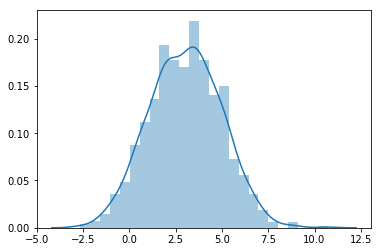

In [291]:
sns.distplot(data, kde=True)

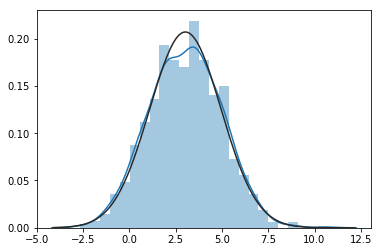

In [295]:
class NormalFit:
    def fit(self, data):
        return np.mean(data), np.std(data)
    
    def pdf(self, x, *fit_args):
        μ, σ = fit_args
        C_i = np.sqrt(2*np.pi*σ**2)
        logbase =  -(x-μ)**2 / (2*σ**2) 
        return np.exp(logbase)/C_i
    
sns.distplot(data, fit=NormalFit())

The object interface is designed to be used with scipy.stats distributions in general, so one doesn't need to write a class for **most** distributions, but it does allow to use fixed parameters, or to use bayesian priors, etc...

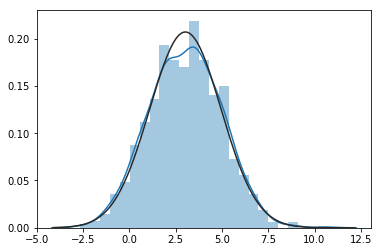

In [293]:
import scipy.stats as st
sns.distplot(data, fit=st.norm)

# Scikit-learn (sklearn) use case

scikit learn is the main machine learning library in python.
For our current discussion, we can say that sklearn is based on two pillars:

* Classifiers, Regressors and Transformers
* pipelines and unions

Sklearn emploies a very simple interface api for the first group, and leverage the second group to hierarchically create the whole analysis pipeline

This allowed anyone to write classes compatible with all the other sklearn compatible classes, driving an explosion of methods and libraries that all work together nicely.

These good API choices basically singlehandedly put python in the machine learning community attention

The basic idea of `Classifiers`, `Regressors` and `Transformers`, is that all of them implement a compatible interface:

* **Transformers** implements a method `fit` and a method `transform`
* **Regressors** and **Classifiers** implement the methods `fit` and `predict`

the idea is that with the `fit` function this object "learns" from the data, then they apply to (ideally) new data to predict the expected value or to transform them.

* **fit(X, y)** should take:
    * an array-like **X** (rows for the obsersations, columns for the features)
    * an array-like **y** (rows for the observations, potentially multiple column values)
    * **returns**: the predictor itself
* **predict(X)** should take:
    * an array-like **X** (rows for the obsersations, columns for the features)
    * **returns**: an array-like (rows for the observations, potentially multiple column values)
* **transform(X)** should take:
    * an array-like **X** (rows for the obsersations, columns for the features)
    * **returns**: an array-like (rows for the observations, potentially multiple column values)

Any class that implements these features can inherit from `BaseEstimator` and then from `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin` or `sklearn.base.TransformerMixin` to have their interface completed.

due to the requirements for this extension, I **strongly** suggest to create the classes using the `dataclass` decorator.
It is also a good idea to just store the `__init__` parameters without modyfing them.
If you have to perform some processing and transformations, it's usually better to do them inside the `fit` function.

In [320]:
from dataclasses import dataclass
from typing import List

@dataclass
class ColumnSelector(BaseEstimator, TransformerMixin):
    columns: List[str]

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return X[self.columns]

In [321]:
cs = ColumnSelector(columns=["a", "e"])
print(cs.get_params())

{'columns': ['a', 'e']}


In [324]:
import pandas as pd
df = pd.DataFrame(rn.randn(5, 5), columns=list("abcde"))
cs.fit_transform(df)

,a,e
0,-1.606346,-0.300311
1,0.020452,-0.678270
2,1.406233,0.581932
3,-2.292684,0.420558
4,0.959172,1.054905


The real magic bits are **pipelines** and **unions**.

* **unions** take a series of transformers and combined all of their output in a single transformed dataset. **it behaves like a transformer itself**
* **pipelines** take a list of transformers (and optionally a classifier/regressor at the end) and pipe the data from one to the other. **it behaves like a transformer or estimator itself**

the fact that both unions and pipelines expose the same interface as the objects that they are wrapping means that they can be used inside other unions and pipelines, creating a full data-flow structure that behaves correctly (for example about data leaking).

# The exercise

Our goal might be to implement a groupby standardizer.

a standardizer subtract the average of one or more columns, and divide the data by their standard deviation.

The standard standardizer does use the whole data average, but we might want to do this operation separatedly on different groups, for example by country.

Assuming that all the groupby categories are present in the traning data, try to implement it

# end of the general programming module

# Extra material

this is not part of the lesson material, but it is interesting to have here as a reference.
You can explore these topics in the notebook corresponding to these slides.

topics:
* metaprogramming
* API design and evolution
* using function parameters using the enum module
* notes on subclassing
* fluent Interface

black magic topics
* class registration with ABCMeta
* Classes bodies are code blocks
* Uniform Calling Syntax
* secret attributes with unproper names
* transparent wrapping objects relying attributes exploiting unproper names
* Dynamical class change of an instance
* Attributes with access logging
* Calling interfaces (such as pandas.Series.str)
* dynamical attribute resolution
* A sklearn class to perform column selection from a dataframe including columns operations
* write once attributes

## metaprogramming: metaclasses

classes are objects too.

by default they are of type `type` (which is a class but also an object).
`type` provide an initialization for the class in the same way as the class provide the init to the instance (using the `__new__` method)

One can instantiate a subclass of `type` that provide a different initialization process, and using to generate the new class.
To do this, this new type subclass should be indicated as the class `metaclass` alongside its superclasses.
This allow to personalize the generation of classes.
It is not commonly used in normal programming, but can be very useful for:
* frameworks
* attribute sharing without inheritance from other classes

In [357]:
# type is an object that have type type, which is an object that have type type, etc...
class Empty_base:
    pass

class Empty(Empty_base):
    pass

assert issubclass(Empty, Empty_base)
assert isinstance(Empty, object)

assert type(Empty()) is Empty
assert type(Empty) is type

assert type(type) is type
assert type(object) is type
assert isinstance(type, object)

In [355]:
# dynamical class generation
Foo = type('SomeClass', (Empty, ), {'x':100})
assert Foo.__name__ == 'SomeClass'

someobject = Foo()
assert isinstance(someobject, Foo)
assert type(Foo) is type

someobject.x

100

In [362]:
# we can subclass type and use it to generate classes, and so the new class type in going to be a subclass of type
class Meta(type):
    def __new__(cls, name, bases, dct):
        x = super().__new__(cls, name, bases, dct)
        x.attr = 100
        
        def obscure(self):
            return self.attr
        x.obscure = obscure
        
        return x
    
Foo = Meta('SomeClass', (Empty, ), {})
assert Foo.__name__ == 'SomeClass'

someobject = Foo()
assert isinstance(someobject, Foo)
assert type(Foo) is Meta

assert someobject.obscure() == someobject.attr

In [363]:
class Foo(metaclass=Meta):
    pass

someobject = Foo()
assert isinstance(someobject, Foo)
assert type(Foo) is Meta

assert someobject.obscure() == someobject.attr

## Improving your library API design and management

One of the problems when writing a library is that the requirements and structure of your functions API will change over time.

Improving and changing your API is a non trivial process, as probably there are users relying on your code!

The best thing is to get it right from the beginning.
While this is clearly utopical, in general it is a good idea to follow the old advice of 
> measure twice, cut once

Luckly python provide us with a great number of tools (such as properties, dynamical attributes, magic methods, etc...) that makes it easy to have a post-hoc patch that is transparent to the user but allows you to improve one step at the time.

Here I collect some suggestions that you might find helpful, both for the good design and on how to improve the design over time.

a good discussion can be found in this article: [API evolution the right way](https://emptysqua.re/blog/api-evolution-the-right-way/)

### deprecation warning

once you define a function that use certain parameters, or with certain defaults, and you realize that you need to change them, don't do it straight away!
You will break you users' code, and they will not be thrilled.

the usual solution is to take an intermediate step (usually one release or two of the library before the change will actually happens) to warn your users about the changes in the API.
This is done using the `DeprecationWarning` exception, or a warning logging when the function is called, or raising a warning message from the `warnings` module.

## using function parameters using the `enum` module

a common issue with some APIs, especially old ones in python, is the use of modal parameters using strings.

A **modal parameter** is a parameter that changes the behavior of the function in one of few selected modes.
A common example could be the `histtype` parameter in the `hist` function of matplotlib.
This parameter takes a string to define the kind of histogram that one wants to do.

I've been using this funcion for almost ten years, and I still can't remember if the names are hyphenated, which are available and which not, and so on.
And if one inputs the wrong string, the error message is not helpful enough.

This is a limit in the API: it has a low **discoverability**, meaning that a new user will have a bad time understanding how to use it, or even that it is possible at all.
This is common with graphical functions, that might need to pass parameters to few other functions on the way, and their signature ends up being an unsightly mess.

A better solution is to leverage the **enum** standard library module (introduced in python 3.4) and dynamical attribute assignment

let's consider a function that evolves a dynamical system such as the one we implemented in the first few lessons for cellular automata.

This function has a modal argument, namely the behavior of the system at the boundaries.
This could be:
* **reflective**
* **circular**
* **fixed alive**
* **fixed dead**

the first version would be using a string as a parameter, such as:

```python
def evolve(initial_state, rule, boundary='fixed dead'):
    # do something with those info
```

the problem is that a string is the wrong abstraction: we don't want **any** kind of strings, but only a limited sets of them, but we are still allowing the user to put any value in.
This means that we also have to worry about error management, and be very careful to keep the documentation in line with the values we accept.

a better solution would be to use an enum class

In [428]:
import enum

class BoundaryType(enum.Enum):
    REFLECTIVE = "reflective"
    CIRCULAR = "circular"
    FIXED_DEAD = 'fixed dead'
    FIXED_ALIVE = 'fixed alive'

and would write the function as:
    
```python
def evolve(initial_state, rule, boundary=BoundaryType.FIXED_DEAD):
    # function body
```

Having this enum gives us several advantages:
* it is still compatible with the old definition (the value is identical to the old ones), allowing for a smoother transition
* the user can see in their code what is available, and can leverage their editor's autocompletion capabilities
* there is less risk of mistakes in the code by passing the wrong string

the only disadvantage is that is is slightly more verbose, but this is often worth the improvement in code correctness

this approach has two disadvantages:
* the code is a little bit more verbose
* the user is required to import more stuff from the module, littering the namespace and the import section

We can improve discoverability even further by leveraging functions attributes.

Being functions just another object, we can set any kind of attribute.
In our case we can include the values that the arguments should have in the function attributes, making sure that the function carry with it everything it needs.

In [430]:
def fun():
    pass

fun.x = 3
dir(fun).public

property:
    x

there are three approaches for this implementation:
1. storing all the enums in a single namespace
2. storing each enum in an attribute with the same name of the enum
3. storing each enum in an attribute with the same name of the parameter of the function

#### storing all the enums in a single namespace

This option is useful if only one parameter use the enum, or several parameters do, but sharing the same enum values.

for example, a graphic class for a square might take for each side if the line should be absent, thin or bold.
given that four parameters share the same values and there are no other parameters (for now!), it might make sense to store all the enum values in the function bare

In [436]:
class LineStyle(enum.Enum):
    NO_LINE = 'noline'
    THIN = 'thin'
    BOLD = 'bold'
    
def draw_square(top=LineStyle.THIN, bottom=LineStyle.THIN, left=LineStyle.THIN, right=LineStyle.THIN):
    pass

for style in LineStyle:
    setattr(draw_square, style.name, style)

dir(draw_square).public

property:
    BOLD, NO_LINE, THIN

And this function could then be called with:

```python
draw_square(bottom=draw_square.BOLD)
```

this approach can be useful when one of the parameters (tipically the first or second) have a predominant role in the behavior of the function, changing it drastically rather than fine-tuning it.

#### each enum in an attribute with the same name of the enum

This is a little more verbose, but helps the user understand what the enumerator is referring about, and have the advantage of using the same expression that would appear in the function signature.

this means, on the other end, that we increase the verboseness of our code further

In [437]:
class LineStyle(enum.Enum):
    NO_LINE = 'noline'
    THIN = 'thin'
    BOLD = 'bold'
    
def draw_square(top=LineStyle.THIN, bottom=LineStyle.THIN, left=LineStyle.THIN, right=LineStyle.THIN):
    pass

draw_square.LineStyle = LineStyle

dir(draw_square).public

class:
    LineStyle: An enumeration.

An now the call would be in this (verbose but clear):
```python
draw_square(bottom=draw_square.LineStyle.BOLD)
```

there is nothing stopping the user to use two lines instead of one, and redefine the values locally

```python
bold = draw_square.LineStyle.BOLD
draw_square(bottom=bold)
```

#### each enum in an attribute with the same name of the parameter

if the function has several parameters (or we want to be safe for future extensions), one solution would be to set as name of the attribute not the name of the enum class, but of the attribute.
This would obfuscate a little bit the connection between the function signature and the value passed, but as you will see, this is quite clear to read anyway.

let's assume that we want to put some other parameter, for example the shape of the corners of our square...

In [440]:
class CornerStyle(enum.Enum):
    POINTY = 'pointy'
    SQUARED = 'squared'
    CURVED = 'curved'
    
def draw_square(corners=CornerStyle.SQUARED):
    pass

draw_square.corners = LineStyle

dir(draw_square).public

class:
    corners: An enumeration.

and the call to the function would be something like:

```python
draw_square(corners=draw_square.corners.CURVED)
```

again, it is verbose, but can be shortened as shown before.
It also have the advantage of showing explicitely the connection between the parameter and the values that it can take.

Of course there can be a mixture of all the approaches, depending on the function at hand.

## notes on subclassing
* when you write a class try to make it eay to subclass! for example refer to `self.__class__` and `self.__class__.__name__` instead of specifically using the class and its name
* the instance of `self` might not be the class you are writing right now, but one of its derived ones! keep things generic unless you need it!
* this is true also for `super()`. it does not refer to the ancestor of the class you're writing, but to the ancestor of the object you're having as self, that might include some completely different classes.
* subclassing is delegating work, so its the instance that have the complete control on what gets executed
* try to focus all the violations of Liskov substitution principle in one (or very few methods) so that by overriding those you can have a fully functioning class that follow the principle as possible as it can
* the open-closed principle: open to extension, closed to modification. when you subclass you should not break the unsedlying assumptions of the base class

## Fluent Interface

Fluent interfaces are a variant of object oriented interfaces where methods that act on the object without creating a new one returns the object itself rather than nothing.

This allows to chain the methods in a semi-pipeline form.

In [1]:
class FluentNumber:
    def __init__(self, value):
        self.value = value
        
    def add(self, value):
        self.value += value
        return self
    
    def multiply(self, value):
        self.value *= value
        return self
    
number2 = FluentNumber(2)
result = number2.add(3).multiply(2)
print(result.value)

10


# Black Magic section

this is not lecture topic, but some weird (somewhat useful) tricks that you might want to check out

## class registration with ABCMeta

In [81]:
class PippoInterface(metaclass=abc.ABCMeta):
    pass
        
@PippoInterface.register
class Myclass:
    def pippo(self):
        pass

obj = Myclass()
assert issubclass(Myclass, PippoInterface)
assert isinstance(obj, PippoInterface)

## Classes bodies are code blocks

Classes bodies are code blocks that get executed when the class is defined.

This means that ny construct that one might want to employ is legitimate, including exotic ones such as conditional declaration.

Albeit not very useful in global space classes, it is useful in some situations such as second order classes.


In [254]:
class Temp:
    a = 4
    print(f"I'm executing but not doing anything, with a value of {a}")
    del a
dir(Temp).public

I'm executing but not doing anything, with a value of 4


In [82]:
debug_mode = True
import logging

class Conditional:
    if not debug_mode:
        def __init__(self, a):
            self.a = a
    else:
        def __init__(self, a):
            self.a = a
            logging.warning("setting 'a' to {}".format(a))
            
myobj = Conditional(a=3)

note that changing the value of `debug_mode` mode does not change the behavior of the class.

The definition itself was conditional, now the behavior is determined.

In [83]:
debug_mode = False
myobj = Conditional(a=3)

note that there is a limitation: it is not possible to reference the class itself inside its definition.

This is because the class name is bound to the namaspace only after the definition code has been run, and it does not exists beforehand

## Uniform Calling Syntax

Python does not normally support it, but nothing stops you from implementing it for some specific classes.

You probably shouldn't, but hey, who's going to stop you?

In [1]:
from functools import partial
class DarkMagic:
    def __getattr__(self, name):
        func = eval(name) # dynamical resolution of the function name
        if not callable(func):
            raise TypeError("the requested dynamic attribute with name <{}> is not a function".format(name))
        return partial(func, self)
    
def hideous_function(self, b):
    return self.a*b*2

dark_beast = DarkMagic()
dark_beast.a = 3
dark_beast.hideous_function(b=3)

18

## secret attributes with unproper names

In [85]:
# if you know what you're doing, you can do some weird ass stuff
# like attributes with names that are not legitimate attribute names 
# and can't therefore be accessed with the dot operator
class HiddenMagic:
    def __init__(self, a):
        setattr(self, "_secret 'a'", a)
        
    @property
    def a(self):
        return getattr(self, "_secret 'a'")
        
crazy_obj = HiddenMagic(3)
print(crazy_obj.a)
dir(crazy_obj).own

3


property:
    _secret 'a'
special attribute:
    __dict__, __doc__, __module__, __weakref__
object customization:
    __init__
descriptor:
    a: @property with getter

## transparent wrapping objects relying attributes exploiting unproper names

In [89]:
class Wrapper:
    @classmethod
    def unwrap(cls, obj):
        return getattr(obj, "_ other _ ")
    
    def __init__(self, other):
        self.__dict__["_ other _ "] = other
        
    def __getattr__(self, name):
        other = getattr(self, "_ other _ ")
        return getattr(other, name)
    
    def __setattr__(self, name, value):
        other = getattr(self, "_ other _ ")
        return setattr(other, name, value)
    
class Empty:
    pass

tipo = Empty()
wrapped = Wrapper(tipo)
wrapped.a = 2
print(wrapped.a, tipo.a)
print(Wrapper.unwrap(wrapped))

2 2


## Dynamical class change of an instance

In [86]:
class Worm:
    def mutate(self):
        self.__class__ = Butterfly
        
class Butterfly:
    def describe(self):
        return "I'm fabulous"

beast = Worm()
beast.mutate()
beast.describe()

"I'm fabulous"

## Attributes with access logging

In [87]:
# implements a count access for an attribute...this is terrible practices!
# this can be done, but one might be better off using a Descriptor
from collections import namedtuple
rw_counts = namedtuple("RWcounts", ["reads", "writes"])

class AnotherWeirdo:
    def __init__(self):
        self._a = 0
        self._a_readings = 0
        self._a_writings = 0
    
    @property
    def a(self):
        self._a_readings += 1
        return self._a
    
    @a.setter
    def a(self, value):
        self._a_writings += 1
        self._a = value
        
    def get_access_stats(self):
        return rw_counts(self._a_readings, self._a_writings)
        
weirdo = AnotherWeirdo()
weirdo.a = 3
print(weirdo.a)
print(weirdo.a)
print(weirdo.get_access_stats())

3
3
RWcounts(reads=2, writes=1)


## Calling interfaces (such as `pandas.Series.str`)

In [88]:
# a map-calling interface similar to that of pandas' Series.str
class MapInterface:
    def __init__(self, target):
        setattr(self, "_ target _", target)
        
    def __getattr__(self, function):
        setattr(self, "_ target function_", function)
        return self
    
    def __call__(self, *args, **kwargs):
        target = getattr(self, "_ target _")
        funcname = getattr(self, "_ target function_")
        results = []
        for item in target:
            function = getattr(item, funcname)
            result = function(*args, **kwargs)
            results.append(result)
        return MyList(results)
            
class MyList(list):
    @property
    def str(self):
        return MapInterface(self)
        
mylist = MyList('abcde')
print(mylist)
print(mylist.str.replace('a', 'A'))

['a', 'b', 'c', 'd', 'e']
['A', 'b', 'c', 'd', 'e']


## dynamical attribute resolution

In [250]:
class MyEvilList(list):
    def __getattr__(self, name):
        base, cls = name.split('_')
        assert base == 'getas'
        cls = eval(cls)
        return cls(iter(self))
    
a = MyEvilList([1, 2, 3])
print(a.getas_tuple)
print(a.getas_set)

(1, 2, 3)
{1, 2, 3}


## A sklearn class to perform column selection from a dataframe including columns operations

In [315]:
# a class as the one used in the example, but that can parse generic formulas in the dataframe space using eval
from dataclasses import dataclass
from typing import List
import pandas as pd

@dataclass
class ColumnSelector(BaseEstimator, TransformerMixin):
    columns: List[str]

    def fit(self, X, y=None):
        return self

    def transform(self, X: pd.DataFrame):
        new_series = {col: X.eval(col) for col in self.columns}
        return pd.DataFrame(new_series)


df = pd.DataFrame(rn.randn(100, 5), columns=list("abcde"))
            
cs = ColumnSelector(columns=["a", "e", "abs(a)*exp(e)"])
print(cs.get_params())
cs.fit_transform(df).head()

{'columns': ['a', 'e', 'abs(a)*exp(e)']}


,a,e,abs(a)*exp(e)
0,0.987063,0.307840,1.342883
1,0.817038,-1.034727,0.290312
2,0.143144,0.078301,0.154803
3,2.307495,1.301436,8.479050
4,-0.218387,-0.722837,0.105999


## write once attributes

this class behave like a namespace where the variables can be instantiated with a value and never changed again (can change them internally, but their identity doesn't change).

In [413]:
class NameSpace:
    def __init__(self, **kwargs):
        for name, value in kwargs.items():
            self.__setattr__(name, value)
            
    def __setattr__(self, name, value):
        if hasattr(self, name):
            raise AttributeError("tried to rewrite an attribute!")
        super().__setattr__(name, value)
        
namespace = NameSpace(a=4)
namespace.b = 4
assert namespace.a == 4 == namespace.b
namespace.a = 2

AttributeError: tried to rewrite an attribute!